What artist has the most top 200 songs

In [1]:
import pandas as pd
from datetime import datetime
df = pd.read_csv("charts.csv", encoding='utf-8')
#print(df)

                           artist  song_count
41243                         Jul         232
81314                Taylor Swift         174
8110                          BTS         166
21244                Die drei ???         139
80691                       TWICE         124
22824                       Drake         122
23921                  Ed Sheeran         115
29587                      Future         107
22027              Djadja & Dinaz         102
45510                    Kontra K          93
62235                       Ninho          91
84585                  Tory Lanez          88
85925                      Ufo361          87
41204                  Juice WRLD          85
1561                       ARASHI          85
64963                         PLK          82
85014                Trippie Redd          82
49874                       Logic          81
16296                    Coldplay          81
25473                      Eminem          80
60083                     NCT 127 

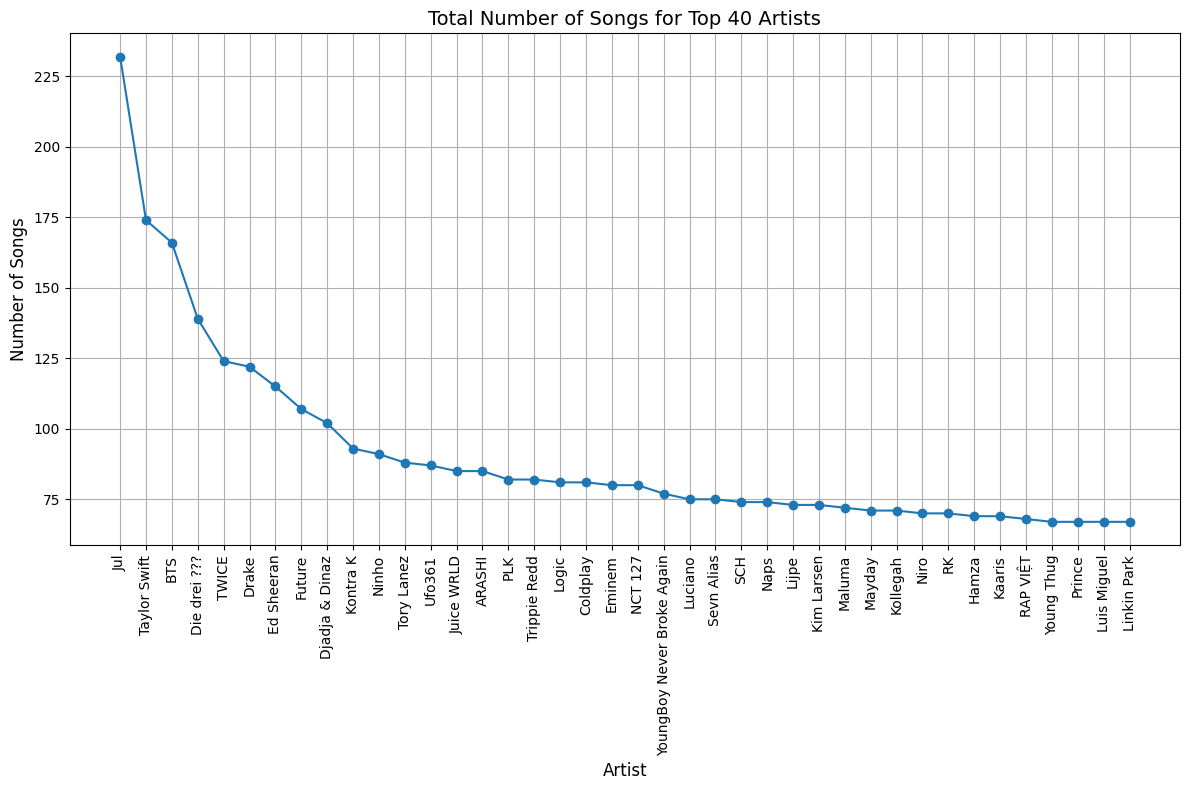

In [9]:
import matplotlib.pyplot as plt
sub_set = df.groupby('artist')['title'].nunique().reset_index()
sub_set.columns = ['artist', 'song_count']

# Sort by the number of songs in descending order and select the top 40
top_artists = sub_set.sort_values(by='song_count', ascending=False).head(40)
# Plot the data using a line plot
plt.figure(figsize=(12, 8))
plt.plot(top_artists['artist'], top_artists['song_count'], marker='o')
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Total Number of Songs for Top 40 Artists', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
sub_set = df[['title','artist','streams','date']]
#data = sub_set.groupby(['artist','title'])['streams'].max().reset_index()
#data = data.sort_values(by='streams',ascending=False)
#print(data.head(40))
data = sub_set.groupby(['artist'])['streams'].sum().reset_index()
data = data.sort_values(by='streams',ascending=False)
data['streams'] = data['streams'] / 1000000000
data = data.head(40)

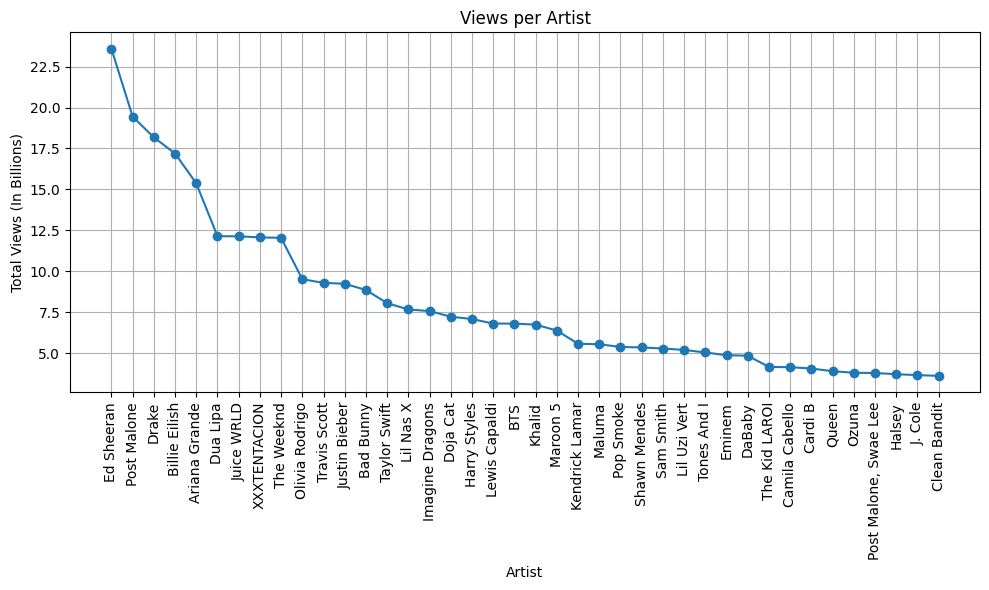

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(data['artist'], data['streams'], marker='o')
plt.xlabel('Artist')
plt.ylabel('Total Views (In Billions)')
plt.title('Views per Artist')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
#Top 40 Ed Sheeran Songs
sub_set = df[['title','artist','streams']]
data = sub_set[sub_set['artist'] == 'Ed Sheeran']
data = data.groupby('title')['streams'].sum().reset_index()
data = data.sort_values(by='streams',ascending=False)

data['streams'] = data['streams'] / 1000000
data = data.head(40)
print(data)



                                                 title      streams
81                                        Shape of You  5245.740051
69                                             Perfect  3038.712776
48                   I Don't Care (with Justin Bieber)  2296.138118
16                     Beautiful People (feat. Khalid)  1612.020133
10                                          Bad Habits  1473.943611
75                                          Photograph  1081.454379
22                                  Castle on the Hill  1021.200333
39                                         Galway Girl  1007.337746
106                                  Thinking out Loud   853.200137
42                                             Happier   782.141998
88                                             Shivers   682.270914
94   South of the Border (feat. Camila Cabello & Ca...   604.772162
73                 Perfect Duet (Ed Sheeran & Beyoncé)   592.415980
28       Cross Me (feat. Chance the Rapper & PnB

In [67]:
sub_set = df[['title','artist','streams','date']]
data = sub_set.groupby(['artist'])['streams'].sum().reset_index()

date = sub_set.groupby('artist')['date'].min().reset_index()
date['date'] = pd.to_datetime(date['date'])
current_date = pd.to_datetime("today")

data = data.sort_values(by='streams',ascending=False)
data = data.head(40)
data['streams'] = data['streams']
data['date'] = date['date']

data['popularity_rate'] = (current_date - data['date']).dt.days #Make new column
data['popularity_rate'] = data['popularity_rate'] // 7 #Get the days and temporyly put it into new column
data['popularity_rate'] = data['streams'] / data['popularity_rate'] #Put the popularity rate by dividing streams by weeks

data['popularity_rate'] = data['popularity_rate'] / 1000000
data['streams'] = data['streams'] / 1000000000


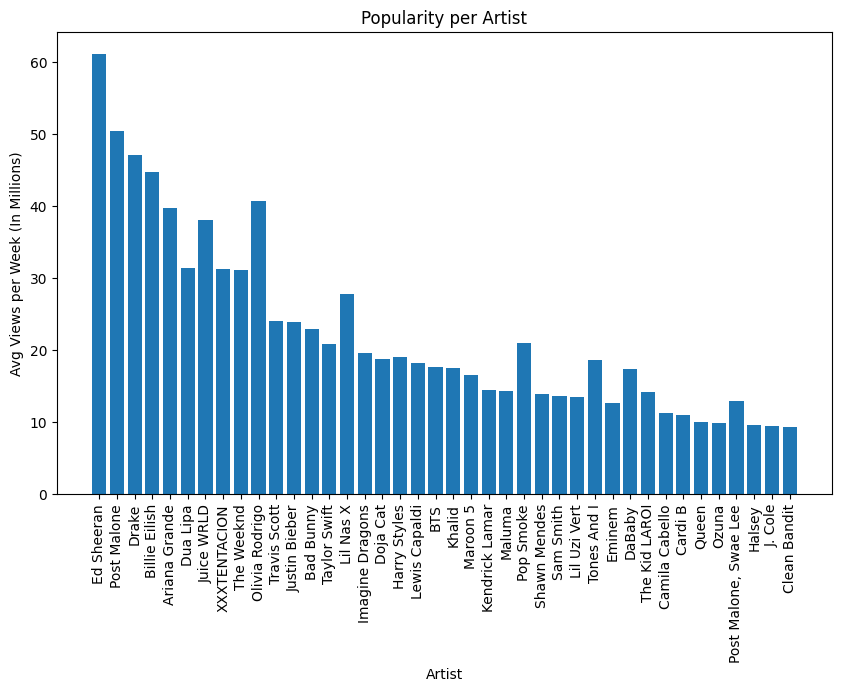

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(data['artist'], data['popularity_rate'])
plt.xlabel('Artist')
plt.ylabel('Avg Views per Week (In Millions)')
plt.title('Popularity per Artist')
plt.xticks(rotation=90)
plt.grid(False)
#plt.tight_layout()
plt.show()

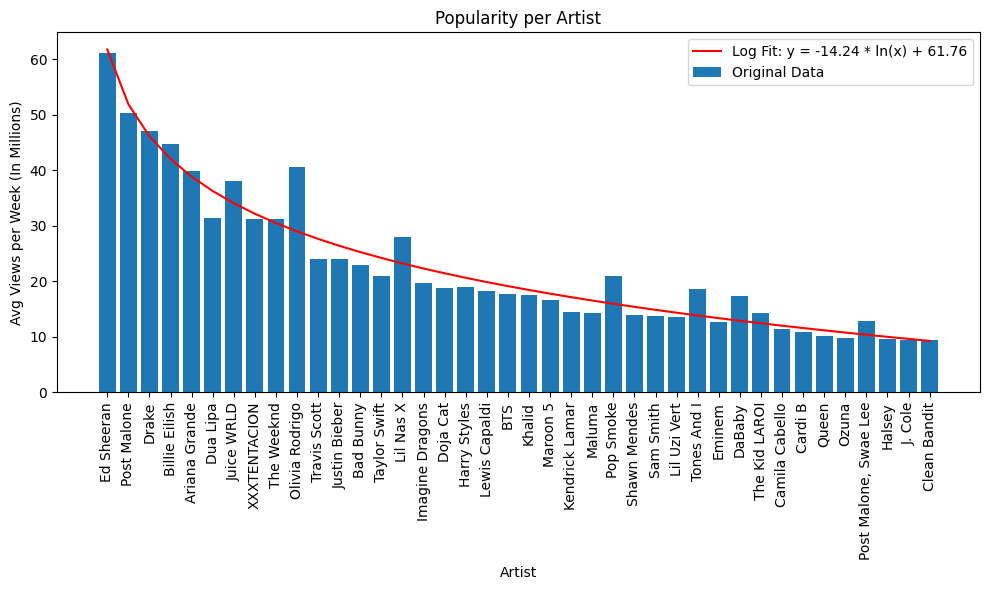

Logarithmic Fit: y = -14.24 * ln(x) + 61.76


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming df is already defined and populated with data
sub_set = df[['title', 'artist', 'streams', 'date']]
data = sub_set.groupby(['artist'])['streams'].sum().reset_index()

date = sub_set.groupby('artist')['date'].min().reset_index()
date['date'] = pd.to_datetime(date['date'])
current_date = pd.to_datetime("today")

data = data.sort_values(by='streams', ascending=False)
data = data.head(40)
data['streams'] = data['streams']
data['date'] = date['date']

data['popularity_rate'] = (current_date - data['date']).dt.days  # Make new column
data['popularity_rate'] = data['popularity_rate'] // 7  # Get the days and temporarily put it into new column
data['popularity_rate'] = data['streams'] / data['popularity_rate']  # Put the popularity rate by dividing streams by weeks

data['popularity_rate'] = data['popularity_rate'] / 1000000
data['streams'] = data['streams'] / 1000000000

# Define a logarithmic function for curve fitting
def log_func(x, a, b):
    return a * np.log(x) + b

# Fit the data to the logarithmic function
x_data = np.arange(len(data))
y_data = data['popularity_rate'].values
popt_log, _ = curve_fit(log_func, x_data + 1, y_data, maxfev=10000)  # +1 to avoid log(0)

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(data['artist'], data['popularity_rate'], label='Original Data')

# Plot the logarithmic trend line
x_fit = np.linspace(1, len(data), 100)
y_fit_log = log_func(x_fit, *popt_log)
plt.plot(data['artist'], log_func(np.arange(1, len(data) + 1), *popt_log), 'r-', label=f'Log Fit: y = {popt_log[0]:.2f} * ln(x) + {popt_log[1]:.2f}')

plt.xlabel('Artist')
plt.ylabel('Avg Views per Week (In Millions)')
plt.title('Popularity per Artist')
plt.xticks(rotation=90)
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

# Display the formula
log_formula = f"Logarithmic Fit: y = {popt_log[0]:.2f} * ln(x) + {popt_log[1]:.2f}"
print(log_formula)
